# Week 10 and 11 Assignment - Programming Fundamentals NB

## Final project

Our project, for now titled History Helper, hopes to provide visitors to Philadelphia's historical sites with supplementary information that is not available at the sites themselves. This information will hopefully include primary and secondary text sources such as newspaper articles, biographies, and pamphlets. Additionally, this project will collect simple demographic data about its users for the City of Philadelphia and the Philadelphia Historical Commission to keep track of its audience.

## Week 11 - Practice API 


I'm strugling to find appropiate data for my project. So for this week I'm just going to play around with the weather data in Philadelphia (maybe later we can find a way to integrate it to our project).

In [11]:
# install requests
!pip install requests

import requests

# Define the API endpoint and parameters
url = 'https://api.open-meteo.com/v1/forecast'
params = {
    'latitude': 39.9526,  # Latitude for Philadelphia
    'longitude': -75.1652,  # Longitude for Philadelphia
    'current_weather': True  # Request current weather
}

# Request API
response = requests.get(url, params=params)

# Check for request 
if response.status_code == 200:
    data = response.json()  # Convert response to JSON
    print("Current Weather in Philadelphia:")
    print(data['current_weather'])  # Display current weather details
else:
    print(f"Error. Status code: {response.status_code}") # Note to self: 404 code Vivian mentioned in class


2738.97s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Current Weather in Philadelphia:
{'time': '2024-11-19T04:45', 'interval': 900, 'temperature': 8.8, 'windspeed': 9.5, 'winddirection': 323, 'is_day': 0, 'weathercode': 0}


In [9]:
# Version 2.0

# Ask user for location

city_name = input("Enter the city for which you want the weather: ")

# Condition for Philadelphia only

if city_name.lower() == "philadelphia":
    # Coordinates for Philadelphia
    latitude = 39.9526
    longitude = -75.1652
else:
    print("Currently, only Philadelphia weather can be provided.")
    latitude = 39.9526
    longitude = -75.1652

# Define the API endpoint and parameters

url = 'https://api.open-meteo.com/v1/forecast'
params = {
    'latitude': latitude,
    'longitude': longitude,
    'current_weather': True
}

# API request
 
response = requests.get(url, params=params)

# Check for request

if response.status_code == 200:
    data = response.json()  # Convert response to JSON
    print("\nCurrent Weather in Philadelphia:")
    current_weather = data['current_weather']
    print(f"Temperature: {current_weather['temperature']}°C")
    print(f"Wind Speed: {current_weather['windspeed']} km/h")
    print(f"Weather Condition: {current_weather['weathercode']} (raw code)")
else:
    print(f"Error. Status code: {response.status_code}")  # Note to self: 404 code Vivian mentioned in class


Current Weather in Philadelphia:
Temperature: 8.8°C
Wind Speed: 9.5 km/h
Weather Condition: 0 (raw code)


I'll be trying to make a graph with matplotlib now. 


Current Weather in Philadelphia:
Temperature: 8.8°C
Wind Speed: 9.5 km/h
Weather Condition: 0 (raw code)


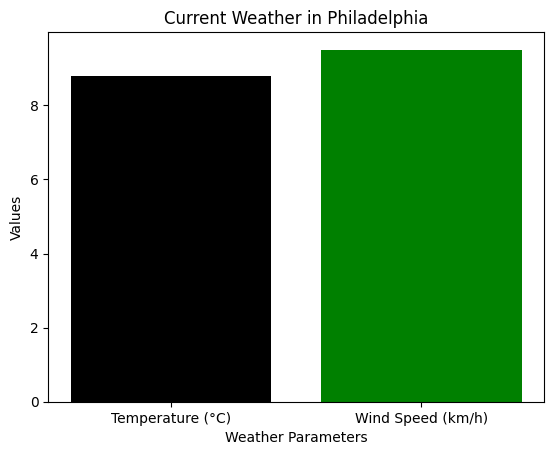

In [12]:
import requests
import matplotlib.pyplot as plt

# Ask user for location
city_name = input("Enter the city for which you want the weather: ")

# Condition for Philadelphia only
if city_name.lower() == "philadelphia":
    # Coordinates for Philadelphia
    latitude = 39.9526
    longitude = -75.1652
else:
    print("Currently, only Philadelphia weather can be provided")
    latitude = 39.9526
    longitude = -75.1652

# Define the API endpoint and parameters
url = 'https://api.open-meteo.com/v1/forecast'
params = {
    'latitude': latitude,
    'longitude': longitude,
    'current_weather': True
}

# API request
response = requests.get(url, params=params)

# Check for request
if response.status_code == 200:
    data = response.json()  # Convert response to JSON
    print("\nCurrent Weather in Philadelphia:")
    current_weather = data['current_weather']
    temperature = current_weather['temperature']
    wind_speed = current_weather['windspeed']
    weather_code = current_weather['weathercode']
    print(f"Temperature: {temperature}°C")
    print(f"Wind Speed: {wind_speed} km/h")
    print(f"Weather Condition: {weather_code} (raw code)")

    # Create a bar chart
    labels = ['Temperature (°C)', 'Wind Speed (km/h)']
    values = [temperature, wind_speed]

    plt.bar(labels, values, color=['black', 'green'])

    # Add title and labels to the graph
    plt.title(f"Current Weather in Philadelphia")
    plt.xlabel('Weather Parameters')
    plt.ylabel('Values')
    plt.show()

else:
    print(f"Error. Status code: {response.status_code}")  # Note to self: 404 code Vivian mentioned in class


## Sentiment Analysis - Week 12



In [2]:
!pip install nltk pandas


2415.51s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [3]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gabrielafajardobocanegra/nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gabrielafajardobocanegra/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Ideally I wanted to browse through comments of different Philadelphia landmarks, but I had a really hard time with my cvs file because I got an error (something about "default utf-8 encoding," and I couldn't fix it). So I entered it manually with help from CB. I decided to go only with one landmark but repeated "Liberty Bell" because I don't know how to write the code assuming is only this landmark but leaving open the possibility to add others later. 

Ideally I wanted to browse through comments of different Philadelphia landmarks, but I had a really hard time with my cvs file because I got an error (something about "default utf-8 encoding," and I couldn't fix it). So I entered it manually with help from CB. 

In [19]:
import pandas as pd

# Step 1 - Create data (real reviews taken from Google)
data = {
    "landmark": [
        "Liberty Bell",
        "Liberty Bell",
        "Liberty Bell",
        "Liberty Bell",
        "Liberty Bell",
        "Liberty Bell",
        "Liberty Bell",
        "Liberty Bell",
        "Liberty Bell",
        "Liberty Bell",
    
    ],
    "comment": [
        "I loved visiting the Liberty Bell. It is free to view, just have to stand in a line that moved pretty quickly and then you will find yourself in a small museum that shares some history about the bell and showcases some smaller artifacts.",
        "After walking through the short gallery, you will come upon a beautiful room that features the Liberty Bell framed with a tall glass wall and an unobstructed view of Liberty Hall.",
        "The staff was friendly and the process was seamless. You can walk all the way around the bell to take in every detail.",
        "One thing to note is that, though, the bell is free to view anytime, you will need to purchase an advance ticket to tour the inside of Liberty Hall across the street!",
        "The visit to the Liberty Bell was awesome!! There was barely any waiting time!! It was very impressive to see it in real life. I would recommend this place to anyone who goes to Philadelphia for either week or weekends!!",
        "When I came, it was not super busy during a Thursday midday.",
        "I got through security really quickly, and then to see the actual bell, there was not a long line.",
        "The Liberty Bell is definitely a must-see and is very nicely preserved.",
        "Would be better if it was outside. Its a literal tourist trap. Cant really get too close to look at it without interrupting someones photo. The idea of it is nice. The history is nice. Its just too crowded.",
        "Some history about the Bell. You can also see it from outside through the window. Free. You need to go through security so no big bags, no food, etc. Usually, there is a line outside so consider the wheather.",
    ],
}

# Save as a CSV file
df = pd.DataFrame(data)
df.to_csv("landmark_comments.csv", index=False)

print("CSV file 'landmark_comments.csv' created!")


import pandas as pd

# Load the CSV file
df = pd.read_csv("landmark_comments.csv")

# Display the data
print("\nLandmark Comments Data:") # We have had this problem before... we can't see the entire comment. 
print(df)

# Step 2 - Sentiment Analysis 

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each review
df["sentiment"] = df["comment"].apply(lambda x: sia.polarity_scores(x)["compound"])

# Display results
print("\nSentiment Analysis Results:")
print(df)

median_sentiment = df["sentiment"].median()
print("\nThis is the median sentiment of Liberty Bell visitors:", median_sentiment) 
print("Remember! Negative numbers correspond with negative reviews, numbers closer to 1 correspond with positive reviews and 0 stands for neutral positions.")

CSV file 'landmark_comments.csv' created!

Landmark Comments Data:
       landmark                                            comment
0  Liberty Bell  I loved visiting the Liberty Bell. It is free ...
1  Liberty Bell  After walking through the short gallery, you w...
2  Liberty Bell  The staff was friendly and the process was sea...
3  Liberty Bell  One thing to note is that, though, the bell is...
4  Liberty Bell  The visit to the Liberty Bell was awesome!! Th...
5  Liberty Bell  When I came, it was not super busy during a Th...
6  Liberty Bell  I got through security really quickly, and the...
7  Liberty Bell  The Liberty Bell is definitely a must-see and ...
8  Liberty Bell  Would be better if it was outside. Its a liter...
9  Liberty Bell  Some history about the Bell. You can also see ...

Sentiment Analysis Results:
       landmark                                            comment  sentiment
0  Liberty Bell  I loved visiting the Liberty Bell. It is free ...     0.9432
1  Liberty 